In [14]:
!pip install pandas

In [9]:
!pip install graphx xlrd

  Using cached graphx-0.0.4-py3-none-any.whl
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [7]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/home/pakhi/Documents/gsoc/gsoc-2024/Growing-GNNs/sorted_output.csv')

# Sort the DataFrame by a specific column
sorted_df = df.sort_values(by='Birth')

# Save the sorted DataFrame back to a CSV file
sorted_df.to_csv('sorted_output.csv', index=False)


In [12]:
# import graphx as gx
import numpy as np
import pandas as pd

data = pd.read_csv('./sorted_output.csv')
# data = data.dropna()
# data = data.reset_index(drop=True)
data.sort_values(by=['Birth'], inplace=True)
print(data.tail(50))

                 Cell      Parent  LineageName   Birth  Death   Type  \
2133       Z4appaappa   Z4appaapp   Z4appaappa  2960.0    NaN    NaN   
2132        Z4paaapap    Z4paaapa    Z4paaapap  2960.0    NaN    NaN   
2131  gon herm spth A    Z1apppap    Z1apppapp  2960.0    NaN  repro   
2154        Z1apppaap    Z1apppaa    Z1apppaap  2960.0    NaN    NaN   
2155     gon herm dut   Z4apapaap   Z4apapaapa  2960.0    NaN  repro   
2157     gon herm dut   Z4apapapp   Z4apapappa  2960.0    NaN  repro   
2141     gon herm dut   Z4apaappp   Z4apaapppp  2960.0    NaN  repro   
2140     gon herm dut   Z4apapapa   Z4apapapap  2960.0    NaN  repro   
2143       Z1paappapa   Z1paappap   Z1paappapa  2960.0    NaN    NaN   
2144     gon herm dut   Z4apaapap   Z4apaapapp  2960.0    NaN  repro   
2142     gon herm dut   Z4apapaap   Z4apapaapp  2960.0    NaN  repro   
2150     gon herm dut   Z4apaapaa   Z4apaapaap  2960.0    NaN  repro   
2139     gon herm dut   Z4apapapa   Z4apapapaa  2960.0    NaN  r

In [7]:

import pandas as pd

# Load the CSV file
file_path = './sorted_output.csv'
cells_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
cells_data.head()

,Cell,Parent,LineageName,Birth,Death,Type,Description,Unnamed: 7,Unnamed: 8
0,AB,P0,AB,0.0,NaN,NaN,Embryonic founder cell.,NaN,NaN
1,P1,P0,P1,0.0,NaN,NaN,NaN,NaN,NaN
2,ABa,AB,ABa,17.0,NaN,NaN,NaN,NaN,NaN
3,ABp,AB,ABp,17.0,NaN,NaN,NaN,NaN,NaN
4,EMS,P1,EMS,18.0,NaN,NaN,NaN,NaN,NaN


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Extract all unique time stamps from the birth column
time_stamps = sorted(cells_data['Birth'].dropna().unique())

# Dictionary to store the state of the graph at each time stamp
graph_snapshots = {}

# Iterate over each time stamp
for time in time_stamps:
    # Filter cells that are born at the current time
    new_cells = cells_data[cells_data['Birth'] == time]
    
    for _, row in new_cells.iterrows():
        parent = row['Parent']
        cell = row['Cell']
        
        # If the parent exists in the graph, remove it (it has divided)
        if parent in G:
            G.remove_node(parent)
        
        # Add the new cell to the graph
        G.add_node(cell)
    
    # Store the snapshot of the graph at the current time
    graph_snapshots[time] = G.copy()

# Function to plot the graph
def plot_graph(graph, time):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)
    plt.title(f"Cell Development at Time {time}")
    plt.show()

print(len(time_stamps))
# Plot the graph at different time stamps
# for time in time_stamps[:10]:  
#     plot_graph(graph_snapshots[time], time)


NameError: name 'cells_data' is not defined

In [17]:
cells_data = pd.read_csv('./sorted_output.csv')
positions_data = pd.read_csv('./developmental-cells-and-position.csv')

n1 = cells_data['Cell']
n2 = positions_data['Parent Cell']
trues = 0
falses = 0
for i in range(len(n2)):
    cell = n2[i]
    if cell in n1.values:
        trues = trues + 1
    else:
        falses = falses + 1
print(trues, falses)

642 0


## from here

179


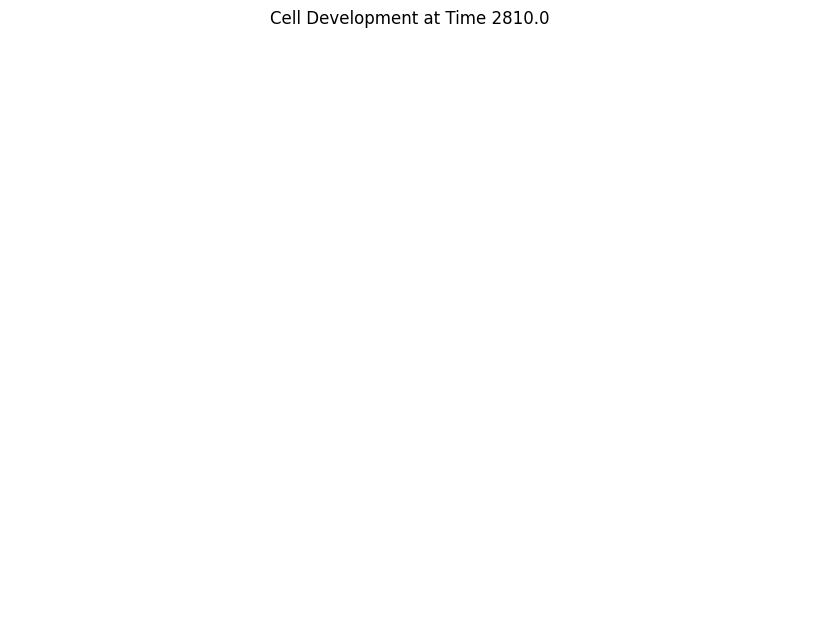

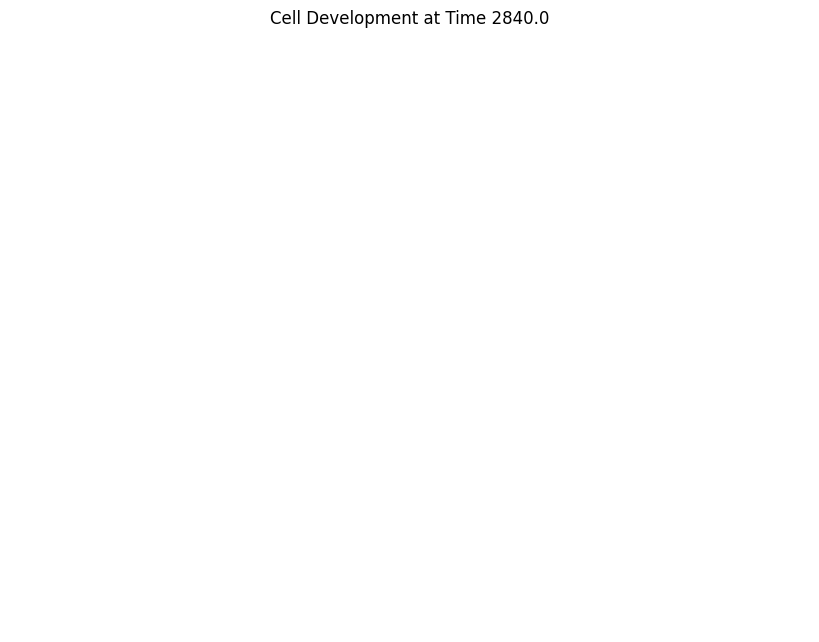

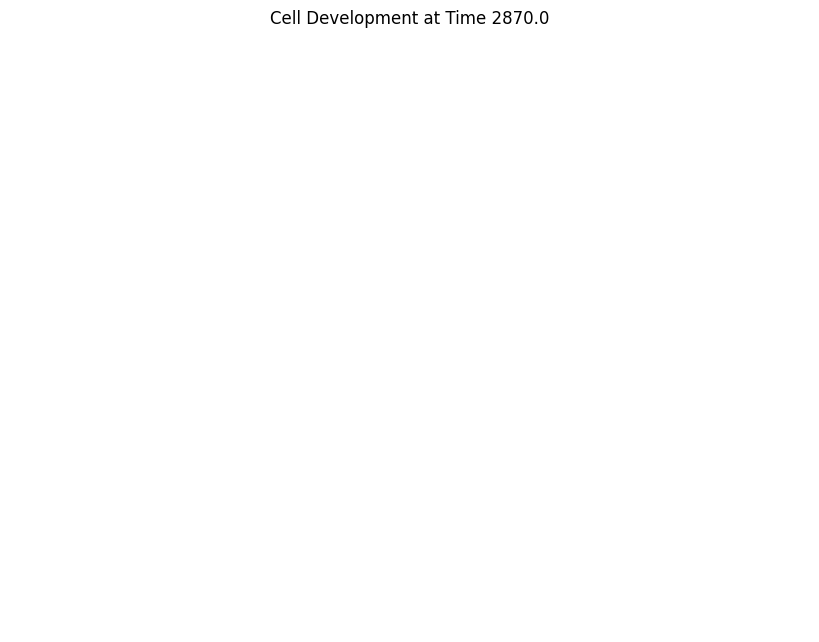

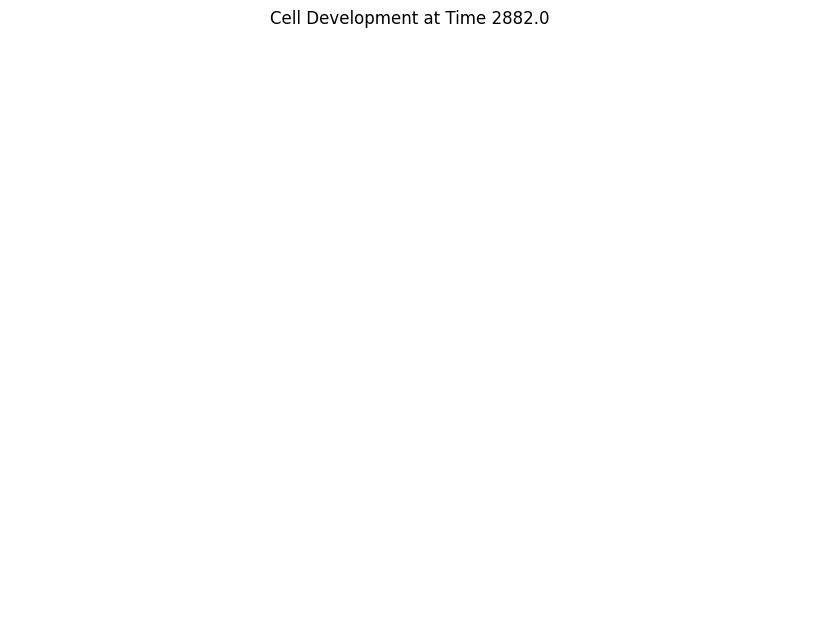

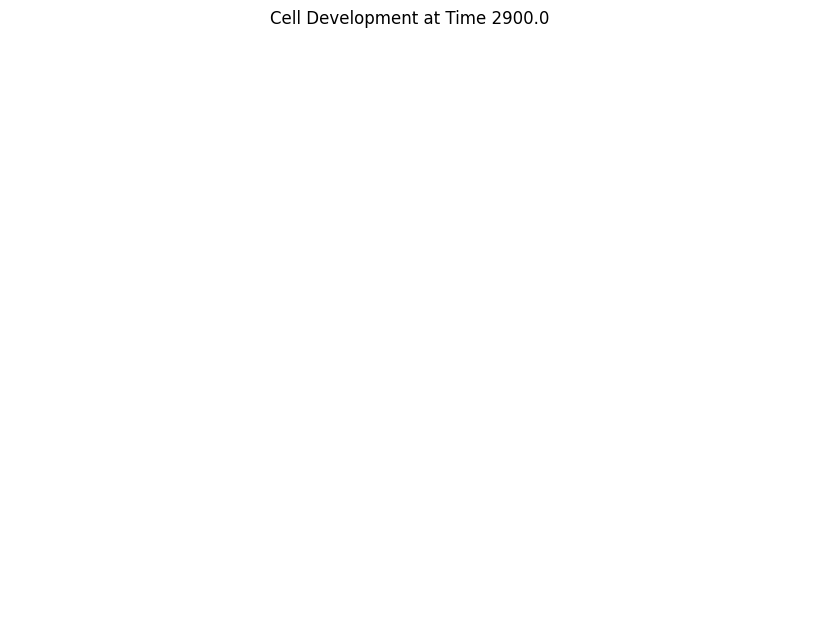

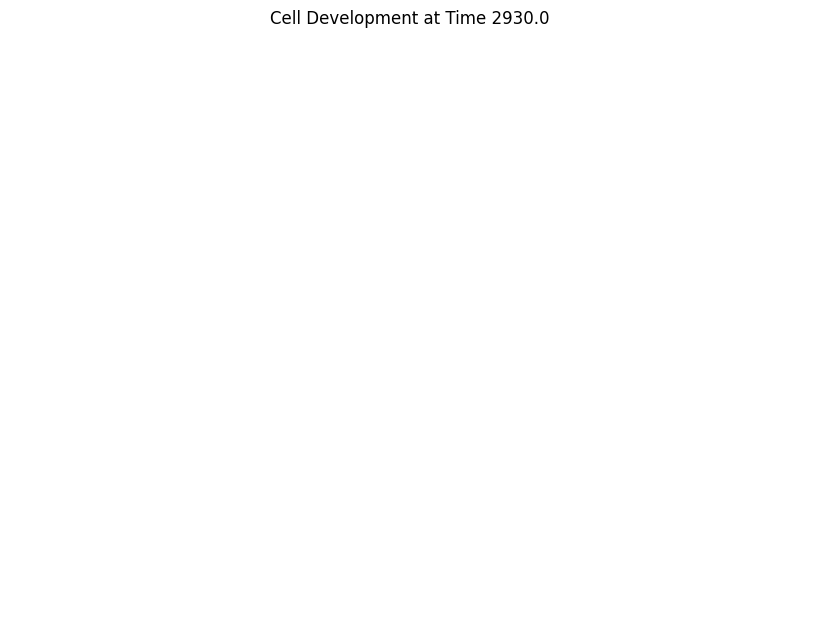

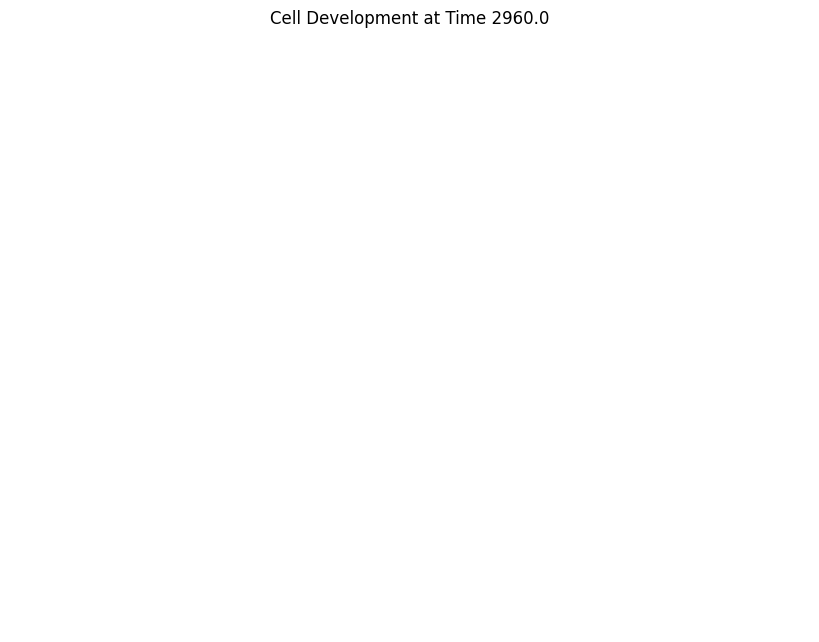

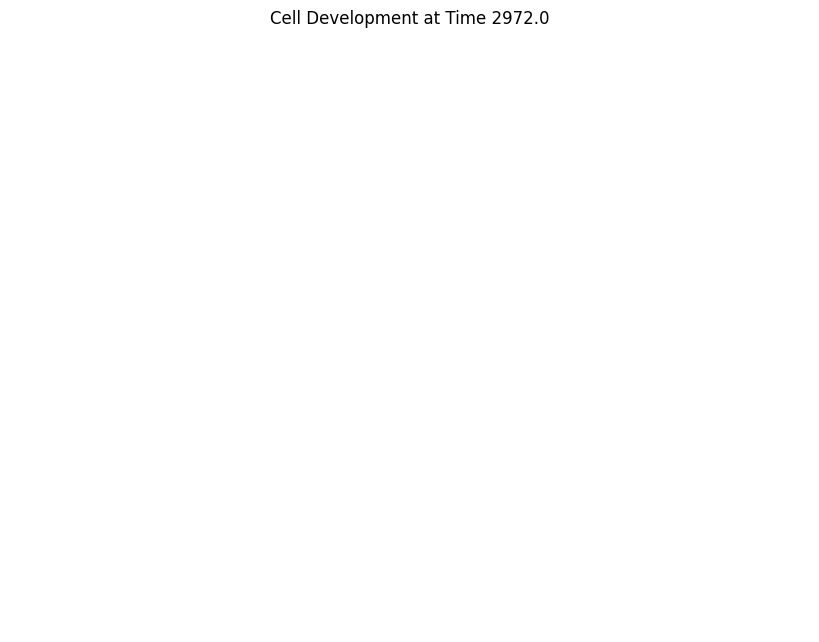

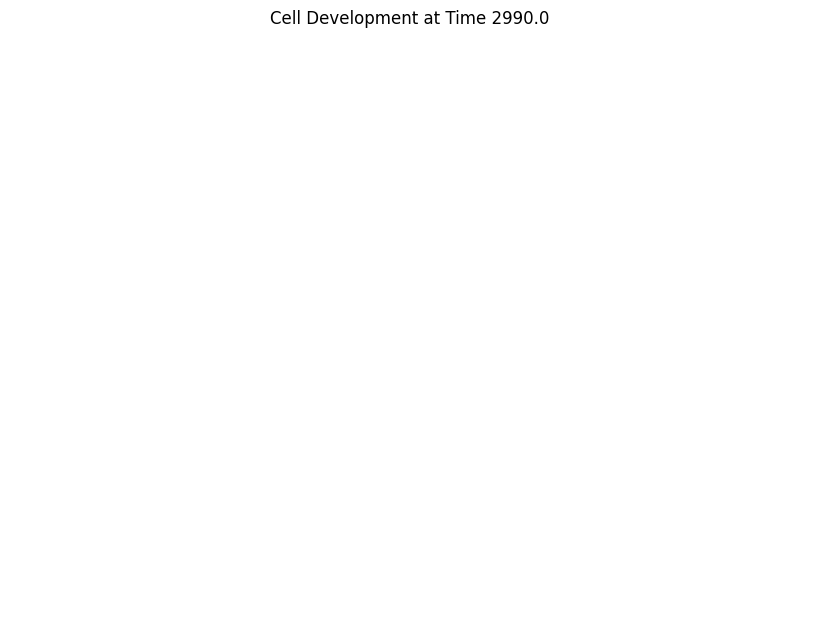

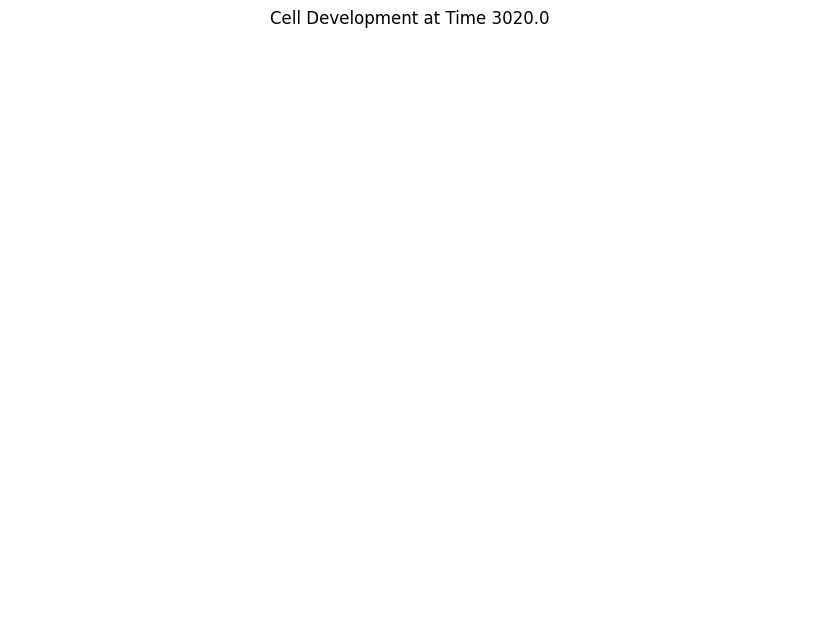

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV files
cells_data = pd.read_csv('./sorted_output.csv')
positions_data = pd.read_csv('./developmental-cells-and-position.csv')

# Initialize an empty graph
G = nx.Graph()

# Extract all unique time stamps from the birth column
time_stamps = sorted(cells_data['Birth'].dropna().unique())

# Dictionary to store the state of the graph at each time stamp
graph_snapshots = {}

# Define a distance threshold for creating edges
distance_threshold = 100.0  # Adjust this value as needed

# Iterate over each time stamp
for time in time_stamps:
    # Filter cells that are born at the current time
    new_cells = cells_data[cells_data['Birth'] == time]
    
    for _, row in new_cells.iterrows():
        parent = row['Parent']
        cell = row['Cell']
        
        # If the parent exists in the graph, remove it (it has divided)
        if parent in G:
            G.remove_node(parent)
        
        # Add the new cell to the graph
        pos_row = positions_data[positions_data['Parent Cell'] == cell]
        if not pos_row.empty:
            pos = (pos_row['parent_x'].values[0], pos_row['parent_y'].values[0], pos_row['parent_z'].values[0])
            G.add_node(cell, pos=pos)
    
    # Add edges based on Euclidean distance
    for cell1 in G.nodes(data=True):
        for cell2 in G.nodes(data=True):
            if cell1[0] != cell2[0]:
                pos1 = np.array(cell1[1]['pos'])
                pos2 = np.array(cell2[1]['pos'])
                distance = np.linalg.norm(pos1 - pos2)
                if True:
                    G.add_edge(cell1[0], cell2[0], weight=distance)
    
    # Store the snapshot of the graph at the current time
    graph_snapshots[time] = G.copy()

# Function to plot the graph
def plot_graph(graph, time):
    pos = {node: data['pos'][:2] for node, data in graph.nodes(data=True)}  # Use only X and Y for 2D plotting
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    plt.figure(figsize=(8, 6))
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    plt.title(f"Cell Development at Time {time}")
    plt.show()

print(len(time_stamps))
# Plot the graph at different time stamps
for time in time_stamps[-10:]:  
    plot_graph(graph_snapshots[time], time)


In [19]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/home/pakhi/Documents/gsoc/gsoc-2024/Growing-GNNs/sorted_output.csv')

# Initialize a dictionary to store the parent and daughter information
parent_daughters_dict = {'Parent': [], 'Daughter 1': [], 'Daughter 2': [], 'Birth Time': []}

# Iterate over the DataFrame to populate the dictionary
for parent, group in df.groupby('Parent'):
    if len(group) >= 2:
        daughters = group['Cell'].tolist()
        birth_times = group['Birth'].tolist()
        parent_daughters_dict['Parent'].append(parent)
        parent_daughters_dict['Daughter 1'].append(daughters[0])
        parent_daughters_dict['Daughter 2'].append(daughters[1])
        parent_daughters_dict['Birth Time'].append(birth_times[0])

# Convert the dictionary to a DataFrame
parent_daughters_df = pd.DataFrame(parent_daughters_dict)

sorted_df = parent_daughters_df.sort_values(by='Birth Time')

# Save the DataFrame to a new CSV file
sorted_df.to_csv('parent_daughters.csv', index=False)
